# Deutsch algorithm

Implementing the algorithm to show the adventage of the quantum computer over the classical

The task given a function, determane if the function is balanced or constant as shown:<br>
Constant:
```
{
f(0) = 0 AND f(1) = 0
}
OR
{
f(0) = 1 AND f(1) = 1
}
```
Balanced:
```
{
f(0) = 0 AND f(1) = 1
}
OR
{
f(0) = 1 AND f(1) = 0
}
```

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import matplotlib
import pandas as pd

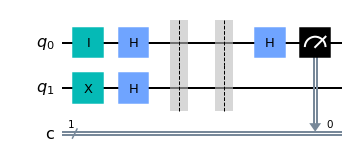

In [33]:
# Build the circuit
qc = QuantumCircuit(2,1)

qc.i(0)
qc.x(1)
qc.h([0,1])

qc.barrier()
# This is our "Black box" function, in this example its a balanced function
qc.cx(0,1)
# For constant function uncomment the cx-gate above

qc.barrier()

qc.h(0)

qc.measure(0,0)


qc.draw()

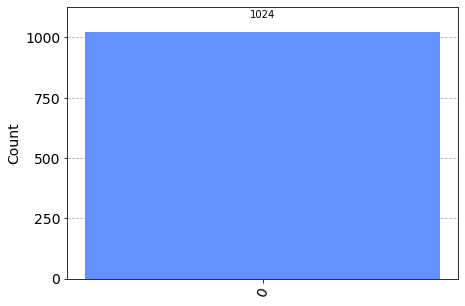

<Figure size 432x288 with 0 Axes>

In [34]:
# Running on a simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()

matplotlib.pyplot.figure()

plot_histogram(result.get_counts())

In [15]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-13 08:22:26,010: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# Searching fot the best real quantum computer to run on
provider = IBMQ.get_provider('ibm-q')

provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
provider.backends()[1].properties().qubits

In [24]:
# Comperison over the available computer
df = pd.DataFrame({"backend":[], "jobs":[], 'qubits':[]})

for backend in provider.backends():
    try:
        qubits = len(backend.properties().qubits)
    except:
        qubits = 'simulated'
    print([backend.name(), backend.status().pending_jobs, qubits])
    df.append(pd.DataFrame([backend.name(), backend.status().pending_jobs, qubits]))
    
print(df)
        

['ibmq_qasm_simulator', 2, 'simulated']
['ibmq_lima', 13, 5]
['ibmq_belem', 15, 5]
['ibmq_quito', 17, 5]
['simulator_statevector', 2, 'simulated']
['simulator_mps', 2, 'simulated']
['simulator_extended_stabilizer', 2, 'simulated']
['simulator_stabilizer', 2, 'simulated']
['ibmq_manila', 2, 5]
['ibm_nairobi', 40, 7]
['ibm_oslo', 1, 7]
Empty DataFrame
Columns: [backend, jobs, qubits]
Index: []


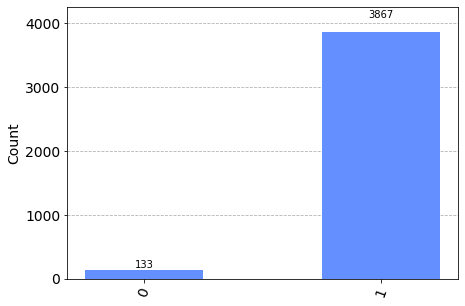

In [25]:
# Running on  real quantum computer
quantum_computer = provider.get_backend('ibm_oslo')
result = execute(qc, backend=quantum_computer).result()

plot_histogram(result.get_counts())
                                       